In [ ]:
#the dumb way
import numpy as np
array = np.zeros((300, 300))
x, y = 150, 150

for i in range(x - 20, x + 20):
    for j in range(y - 20, y + 20):
        array[j, i] = 0.4

for i in range(x - 18, x + 18):
    for j in range(y - 18, y + 18):
        array[j, i] = 0.4

for i in range(x - 12, x + 12):
    for j in range(y - 12, y + 12):
        array[j, i] = 0.6

for i in range(x - 8, x + 8):
    for j in range(y - 8, y + 8):
        array[j, i] = 0.8

for i in range(x - 3, x + 3):
    for j in range(y - 3, y + 3):
        array[j, i] = 1.0


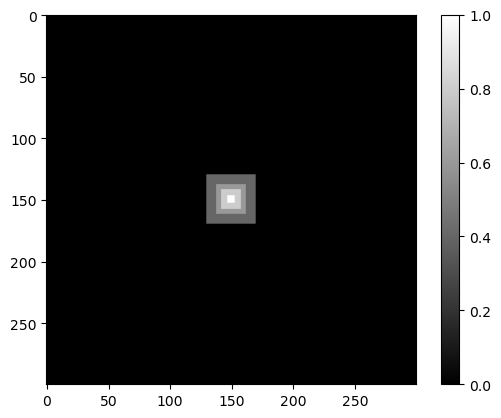

In [12]:
import matplotlib.pyplot as plt
plt.imshow(array, cmap='gray')
plt.colorbar()
plt.show()

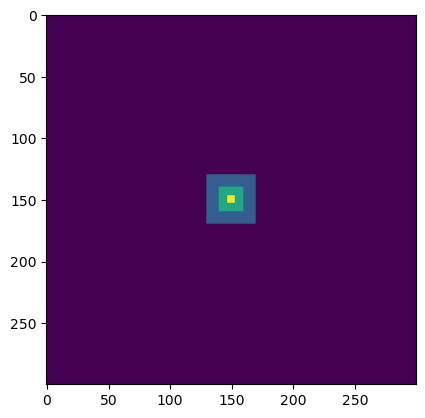

In [ ]:
#the smart way
lx, ly = 300, 300  ## l == length
mx = lx // 2  ## m == mid
my = ly // 2

img = np.zeros((lx, ly))

img[mx-20:mx+20, my-20:my+20] = 0.3
img[mx-10:mx+10, my-10:my+10] = 0.6
img[mx-3:mx+3, my-3:my+3] = 1

plt.imshow(img)

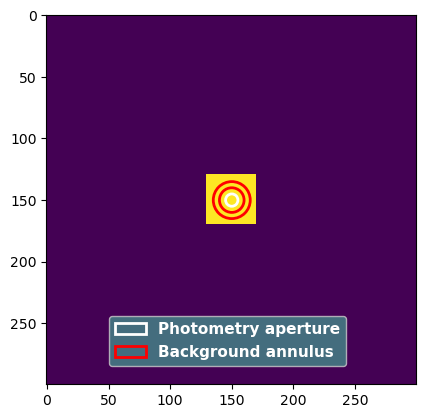

In [ ]:
from photutils.aperture import CircularAnnulus, CircularAperture
from astropy.visualization import simple_norm
positions = [mx, my]
aperture = CircularAperture(positions, r=5)
annulus_aperture = CircularAnnulus(positions, r_in=10, r_out=15)

norm = simple_norm(img, 'sqrt', percent=99)
plt.imshow(img, norm=norm, interpolation='nearest')

ap_patches = aperture.plot(color='white', lw=2, label='Photometry aperture')
ann_patches = annulus_aperture.plot(color='red', lw=2, label='Background annulus')
handles = (ap_patches[0], ann_patches[0])
plt.legend(loc=(0.17, 0.05), facecolor='#458989', labelcolor='white',
           handles=handles, prop={'weight': 'bold', 'size': 11})

In [ ]:
#finding the mean
from photutils.aperture import ApertureStats
aperstats = ApertureStats(img, annulus_aperture)
bkg_mean = aperstats.mean
print(bkg_mean) 

0.37270408163265295


Between the circles of radius 10 and 15, the the pixel values along the x-axis and the y-axis  will be 0.3 and along the 45 degree line the pixel values will be 0.6. So, the mean of 0.37 makes sense.

In [19]:
from photutils.aperture import aperture_photometry
phot_table = aperture_photometry(img, aperture)
for col in phot_table.colnames:
    phot_table[col].info.format = '%.8g'  # for consistent table output
print(phot_table)
aperture.area 

 id xcenter ycenter aperture_sum
--- ------- ------- ------------
  1     150     150     61.52389


78.53981633974483

The cicle of radius 5 as area of 78.5. Our square is a 6x6 square so, some of the pixels inside the circle have value 1 and a minority have value 0.6. 

In [26]:
aperture_area = aperture.area_overlap(img)
#print(aperture_area)
#The total background within the circular aperture
total_bkg = bkg_mean * aperture_area
#print(total_bkg)  
#the background-subtracted photometry
phot_bkgsub = phot_table['aperture_sum'] - total_bkg

#add to the table
phot_table['total_bkg'] = total_bkg
phot_table['aperture_sum_bkgsub'] = phot_bkgsub
for col in phot_table.colnames:
    phot_table[col].info.format = '%.8g'  # for consistent table output
print(phot_table)

 id xcenter ycenter aperture_sum total_bkg aperture_sum_bkgsub
--- ------- ------- ------------ --------- -------------------
  1     150     150     61.52389  29.27211            32.25178


Subtracting the values in the annulus from the aperture. 

The light in the aperture is the observed light - the backgroung light and this is calculated by the mean value in the annulus for each pixel in the aperture.